In [ ]:
import pandas as pd
import keras
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np

In [ ]:
df_train=pd.read_csv("Google_Stock_Price_Train.csv")
df_test=pd.read_csv("Google_Stock_Price_Test.csv")

In [ ]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
training_open=df_train.iloc[:,1:2].values
sc=MinMaxScaler()
training_open=sc.fit_transform(training_open)

In [ ]:
training_open[0:60]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.036

In [ ]:

x_train=[]
y_train=[]
for i in range(60,training_open.size):


  x_train.append(training_open[i-60:i].tolist())
  
  y_train.append([training_open[i][0]])



In [ ]:
y_train=np.array(y_train)
x_train=np.array(x_train)

In [ ]:
x_train[0]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.036

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
model=keras.models.Sequential()

In [ ]:
from keras.backend import dropout
model.add(keras.layers.InputLayer(input_shape=(60,1)))
model.add(keras.layers.LSTM(50,
    activation="relu",return_sequences=True,dropout=0.2))
model.add(keras.layers.LSTM(50,
    activation="relu",return_sequences=True,dropout=0.2))
model.add(keras.layers.LSTM(50,
    activation="relu",dropout=0.2))
model.add(keras.layers.Dense(1,
    activation="relu"))

In [ ]:
model.compile(optimizer="adam",loss="MSE")

In [ ]:
model.fit(x=x_train,y=y_train,batch_size=32,epochs=50,validation_split=0.2)

Epoch 1/50
30/30 [==============================] - 5s 171ms/step - loss: 0.0014 - val_loss: 0.0450
Epoch 2/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0012 - val_loss: 0.0512
Epoch 3/50
30/30 [==============================] - 3s 94ms/step - loss: 0.0012 - val_loss: 0.0520
Epoch 4/50
30/30 [==============================] - 3s 95ms/step - loss: 0.0013 - val_loss: 0.0529
Epoch 5/50
30/30 [==============================] - 3s 95ms/step - loss: 0.0012 - val_loss: 0.0425
Epoch 6/50
30/30 [==============================] - 3s 97ms/step - loss: 0.0013 - val_loss: 0.0441
Epoch 7/50
30/30 [==============================] - 3s 95ms/step - loss: 0.0012 - val_loss: 0.0627
Epoch 8/50
30/30 [==============================] - 3s 94ms/step - loss: 0.0014 - val_loss: 0.0510
Epoch 9/50
30/30 [==============================] - 3s 95ms/step - loss: 0.0013 - val_loss: 0.0472
Epoch 10/50
30/30 [==============================] - 3s 95ms/step - loss: 0.0012 - val_loss: 0.0550
Epoch 11

In [ ]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
test_set=df_test.iloc[:,1:2].values

In [ ]:
df_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [ ]:
last_60_data=x_train[-1]

In [ ]:
last_60_data=last_60_data.reshape((1,60,1))

In [ ]:
last_60_data.shape

(1, 60, 1)

In [ ]:
model.predict(last_60_data)

array([[0.6982653]], dtype=float32)

In [ ]:
# np.append(np.array(last_60_data[0,1:61]),model.predict(last_60_data),axis=0)
last_60_data

array([[[0.93048218],
        [0.9299055 ],
        [0.93113327],
        [0.92750577],
        [0.94415507],
        [0.93876032],
        [0.93403527],
        [0.93483518],
        [0.9313937 ],
        [0.94636878],
        [0.96569685],
        [0.97510976],
        [0.95966962],
        [0.97808617],
        [1.        ],
        [0.98076494],
        [0.97083116],
        [0.98450406],
        [0.96054394],
        [0.9371419 ],
        [0.92841729],
        [0.90804747],
        [0.8771858 ],
        [0.92153434],
        [0.93809063],
        [0.93165414],
        [0.95254483],
        [0.88812412],
        [0.88637547],
        [0.87032145],
        [0.88563137],
        [0.90743359],
        [0.91571173],
        [0.89941588],
        [0.91805566],
        [0.9089404 ],
        [0.9024853 ],
        [0.89456061],
        [0.91600938],
        [0.9132934 ],
        [0.88979835],
        [0.86589404],
        [0.89030062],
        [0.90335962],
        [0.89642086],
        [0

In [ ]:
for i in range(3):
  last_60_data=np.append(np.array(last_60_data[0,1:61]),model.predict(last_60_data),axis=0)
  last_60_data=last_60_data.reshape((1,60,1))


In [ ]:
for i in range(20):
  last_60_data=np.append(np.array(last_60_data[0,1:61]),model.predict(last_60_data),axis=0)
  last_60_data=last_60_data.reshape((1,60,1))

In [ ]:
last_60_data[0,40:60].size
last_60_data=sc.inverse_transform(last_60_data.reshape(60,1))

In [ ]:
print(last_60_data[40:60])
from matplotlib import pyplot

[[637.70532775]
 [629.54478691]
 [620.75531185]
 [611.61309661]
 [602.33310477]
 [593.11065869]
 [584.30817495]
 [575.85750219]
 [567.69891586]
 [559.78816722]
 [552.09574645]
 [544.60427127]
 [537.30441772]
 [530.19029026]
 [523.27010741]
 [516.55692591]
 [510.04803829]
 [503.73223017]
 [497.62148492]
 [491.70761605]]


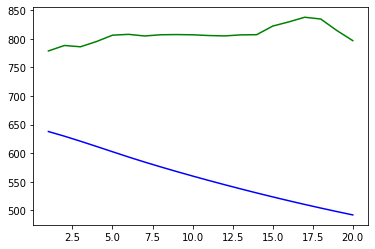

In [ ]:
ep=[]
for i in range(1,21):
  ep.append(i)
pyplot.plot(ep,last_60_data[40:60],'b',label="predict price")
pyplot.plot(ep,test_set,'g',label="actual")